In [ ]:
## regression , classicfication , cluster 

import pandas as pd 
df= pd.read_csv('data/Housing.csv')
df.head()

In [ ]:
df['prefarea']=df['prefarea'].map({'yes':1 , 'no':0})
df['airconditioning']=df['airconditioning'].map({'yes':1 , 'no':0})
df['mainroad']=df['mainroad'].map({'yes':1 , 'no':0})
df['guestroom']=df['guestroom'].map({'yes':1 , 'no':0})
df['basement']=df['basement'].map({'yes':1 , 'no':0})
df['hotwaterheating']=df['hotwaterheating'].map({'yes':1 , 'no':0})

df.head()

In [ ]:
h_status =pd.get_dummies(df['furnishingstatus'])
df=pd.concat([df,h_status], axis=1)
del df['furnishingstatus']
df.head()

In [ ]:
df= (df-df.mean())/ df.std()

df.head()

In [ ]:
import seaborn as sns

x=df['area']
y= df['price']

sns.pairplot(df, x_vars='area', y_vars='price',size=7)



In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('data/advertising.csv')


df.head()

#summerising data

print(df.describe())
print(df.isnull().sum())
df.info()
df.shape


In [ ]:
#visualizing data

#sns.regplot(x="Newspaper", y="Sales",data=df)
sns.pairplot(data=df,x_vars=["TV","Radio","Newspaper"],y_vars=["Sales"])


In [ ]:
#corelation

#df.corr()

sns.heatmap(df.corr(),annot=True)

In [ ]:
#creating model
import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split

In [ ]:
x=df['TV']
y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=100)


x_train.shape

In [ ]:
#training data
x_train_sm = sm.add_constant(x_train)
x_train_sm

In [ ]:
lr=sm.OLS(y_train,x_train_sm)
lr_model= lr.fit()
lr_model.summary()

In [ ]:
plt.scatter(x_train,y_train)
#plt.plot(x_train, 6.9955+0.0541*x_train,'r')
y_predict= lr_model.predict(x_train_sm)
plt.plot(x_train,y_predict,'b')

In [ ]:
#calculate residual normal distribution

residual= y_train- y_predict

sns.distplot(residual)

In [ ]:
#ploting residual scatter 
plt.scatter(x_train, residual)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_test_sm = sm.add_constant(x_test)
y_test_predict= lr_model.predict(x_test_sm)

#rs1= y_test- y_test_predict
#sns.distplot(rs1)

r2_score(y_test,y_test_predict)

In [ ]:
#using sklearn
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
#reshape required for x_train

x_train_lm= x_train.values.reshape(-1,1)

lm.fit(x_train_lm, y_train)


In [ ]:
#multivariable multiliner variable 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('data/Housing.csv')

df.head()
#df.info()
df.describe()
#df.isnull().sum()

In [ ]:
#visualising 


sns.pairplot(data=df) #, xvalues=["area","bedrooms","stories"],y_values="price"
plt.show()

In [ ]:
#for categorical variable use box plot 

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(x="parking",y="price",data=df)
plt.subplot(2,2,2)
sns.boxplot(x="mainroad",y="price",data=df)
plt.subplot(2,2,3)
sns.boxplot(x="airconditioning",y="price",data=df)
plt.subplot(2,2,4)
sns.boxplot(x="furnishingstatus",y="price",hue="airconditioning",data=df)

In [ ]:

#preparing data
cat_cols=['prefarea','airconditioning','mainroad','guestroom','basement','hotwaterheating']
df[cat_cols]=df[cat_cols].apply(lambda x:x.map({'yes':1 , 'no':0}))



In [ ]:

h_status =pd.get_dummies(df['furnishingstatus'])
df=pd.concat([df,h_status], axis=1)
del df['furnishingstatus'],df['furnished']

df

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split


df_train,df_test= train_test_split(df, train_size=0.7,random_state=100)
print(df_train.shape,df_test.shape )

In [ ]:
### normalization and standarization 

#normalization = (x-xmin)/(xmax-xmin) will be (1 to 0)
#standrization = (x-xmean)/std.deviation[sigma]

from sklearn.preprocessing import MinMaxScaler 
scaler= MinMaxScaler()

num_cols=['price','area','bedrooms','bathrooms','stories','parking']
df_train[num_cols]=scaler.fit_transform(df_train[num_cols])

df_train


In [ ]:
#check corelation with columns , filter columns according 

plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

#df_train.corr()

In [ ]:
Y_train = df_train.pop("price")
X_train= df_train

#X_train
Y_train.head()

In [ ]:
#statistic anaylysis , and vif forward parms order 
import statsmodels.api as sm

X_train_sm= sm.add_constant(X_train["area"])

lr= sm.OLS(Y_train,X_train_sm)

#fit
model= lr.fit()

model.summary()

In [ ]:
#add more variable 
X_train_sm= sm.add_constant(X_train[["area","airconditioning"]])

lr= sm.OLS(Y_train,X_train_sm)

#fit
model= lr.fit()

model.summary()

In [ ]:
#add all variable 
X_train_sm= sm.add_constant(X_train)

lr= sm.OLS(Y_train,X_train_sm)

#fit
model= lr.fit()

model.summary()

In [ ]:
#backward way removing 
# p value significance  , VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["features"]=X_train.columns
vif["vif"]= [ round(variance_inflation_factor(X_train.values,i),2) for i in range(X_train.shape[1])]

vif = vif.sort_values(by="vif",ascending =False)

vif




In [ ]:
##remove bedrooms as heigh value of p-val and vif

X_train_sm1= X_train_sm.drop("bedrooms",axis=1)
lr= sm.OLS(Y_train,X_train_sm1)

#fit
model= lr.fit()

model.summary()

In [ ]:
#backward way removing 
# p value significance  , VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

X1=X_train_sm1.drop('const',axis=1)

vif=pd.DataFrame()
vif["features"]=X1.columns
vif["vif"]= [ round(variance_inflation_factor(X1.values,i),2) for i in range(X1.shape[1])]

vif = vif.sort_values(by="vif",ascending =False)

vif




In [ ]:
#residual analysis

y_predict= model.predict(X_train_sm1)
rs=Y_train- y_predict

sns.distplot(rs)

In [ ]:
#prediction on test data 
#scaling for pre
num_cols=['price','area','bedrooms','bathrooms','stories','parking']
df_test[num_cols]=scaler.transform(df_test[num_cols])

df_test.describe()

In [ ]:
Y_test= df_test.pop('price')
X_test = df_test
X_test_1=X_test.drop("bedrooms",axis=1)
X_test_sm=  sm.add_constant(X_test_1)

X_test_sm

In [ ]:

Y_test_predict= model.predict(X_test_sm)
rs=Y_test- Y_test_predict

sns.distplot(rs)

In [ ]:
from sklearn.metrics import r2_score

r2_score(Y_test,Y_test_predict)

In [ ]:
#rfe model 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression



lm=LinearRegression()
#reshape required for x_train

lm.fit(X_train, Y_train)

rfe= RFE(lm, 9)
rfe= rfe.fit(X_train, Y_train)

rfe_cols=X_train.columns[rfe.support_]


In [ ]:
X_train_rfe=X_train[rfe_cols]

X_train_rfe_sm= sm.add_constant(X_train_rfe)

lr= sm.OLS(Y_train,X_train_rfe_sm)

#fit
model= lr.fit()

model.summary()

In [ ]:

lst =[1,42,300,400,900]
i=0
isIn=True

while(len(lst) > i+1):
    if(lst[i]>lst[i+1]):
        isIn=False
        break
    i+=1

print(isIn)        

print([(i,j,k) for i,j,k in zip(lst, lst[1:], lst[2:])])

#print(all(i < j for i, j in zip(input_list, input_list[1:])))

In [ ]:
val = 123456781

print('Even'if (sum([int(n)  for n in  str(val)])%2==0)  else 'odd') 
print('Even'if sum(map(int,str(val)))%2==0  else 'odd') 

In [ ]:
from collections import OrderedDict
lst= ["pasta","pasta","pasta","pasta","pasta","paratha","paratha","paratha"]

frq= list(OrderedDict([ (f,lst.count(f)) for f in lst ]).items())
          
print(frq[0][0] if frq[0][1]> len(lst)*0.5 else 'NOTA')

set(lst)

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('data/insurance.csv')


df.head()

#summerising data

print(df.describe())
print(df.isnull().sum())
print(df.info())
#print(df.shape)


In [ ]:
df['BMI_group']= df.apply(lambda row: 'Underweight' if row['bmi'] < 18.5 else ( \
        'Normal' if row['bmi'] > 18.5  and row['bmi'] < 24.9  else (  \
            'Overweight' if row['bmi'] > 25 and row['bmi'] < 29.9  else 'Obese')), axis=1)
                                                                            
df['is_male']= df['sex'].map({'female':0 ,'male':1})
df['smoker']= df['smoker'].map({'no':0 ,'yes':1})        



In [ ]:
df =pd.get_dummies(df ,columns=['BMI_group'])
df

In [ ]:
df=df.drop(['sex','BMI_group_Normal'], axis = 1) 

df

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [ ]:
#creating model
import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split

X=df[['bmi','age','smoker','BMI_group_Obese']]
Y=df['charges']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=100)

In [ ]:
X_train_sm=sm.add_constant(X_train)

lr= sm.OLS(Y_train,X_train_sm)

#fit
model= lr.fit()

model.summary()

In [ ]:
from sklearn.metrics import r2_score


X_test_sm= sm.add_constant(X_test)

Y_test_predict= model.predict(X_test_sm)

print(r2_score(Y_test,Y_test_predict))



In [ ]:
RSS= Y_test_predict-Y_test

sns.distplot(RSS)

In [ ]:

sns.pairplot(data=df) #, xvalues=["area","bedrooms","stories"],y_values="price"
plt.show()

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('data/CarPrice_Assignment.csv')

#summerising data

#print(df.describe())
#print(df.isnull().sum())
#print(df.info())
#print(df.shape)


#df['brand']= df["CarName"].str.split('-')[0]
#del df["CarName"]

df['is_diesel']= df["fueltype"].map({'gas':0 ,'diesel' :1 })

df['brand']= df["CarName"].map(lambda s : s.split(' ')[0])
#df['']
df.head()

df['brand']=df['brand'].str.lower()
brand_mapping = {
    'vokswagen' : 'volkswagen',
    'vw' : 'volkswagen',
    'porcshce': 'porsche',
    'toyouta':'toyota',
    'maxda':'mazda'
    
}
df['brand']=df['brand'].map(lambda x: brand_mapping.get(x) if x in brand_mapping else x)

df['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

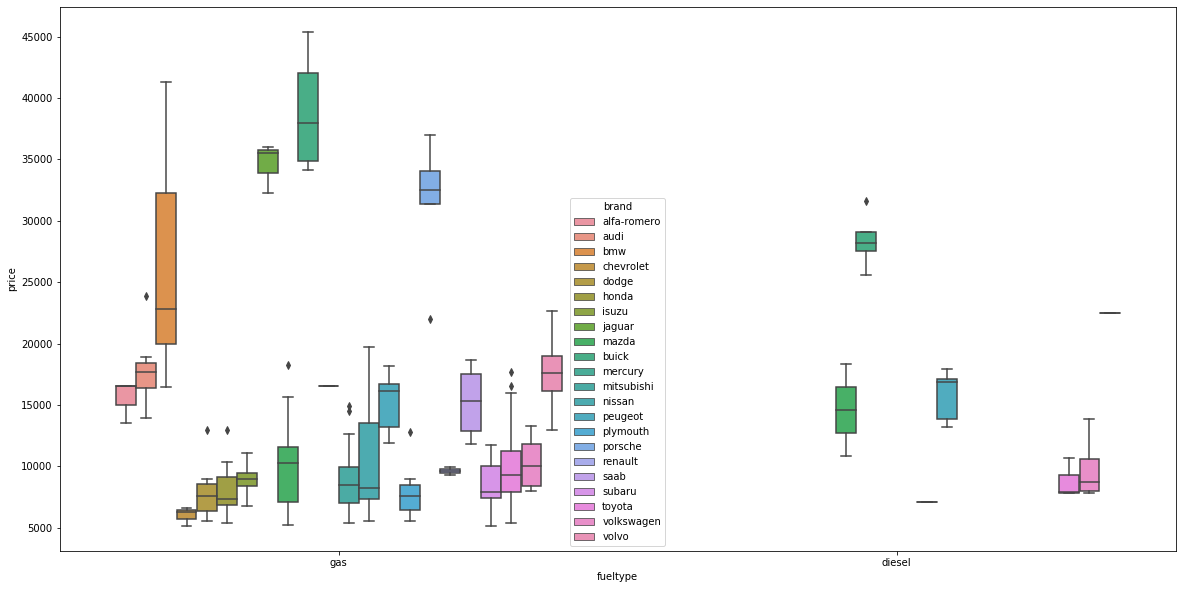

In [2]:
plt.figure(figsize=(20,10))

sns.boxplot(df['fueltype'],df['price'],hue=df['brand'])

In [9]:
print(df['drivewheel'].astype('category').value_counts())

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


In [7]:
df_num=df.select_dtypes(include=['float64', 'int64'])
df_num.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,is_diesel
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0
